In [1]:
import pandas as pd

data = pd.read_csv('mumbai_houses_task_filtred.csv')
data

,price,area,latitude,longitude,bedrooms,bathrooms,balcony,status,neworold,parking,furnished_status,lift,type_of_building
0,22400000,629,19.032800,72.896357,2,2,0,0,1,0,0,0,0
1,35000000,974,19.032800,72.896357,3,2,0,0,1,0,0,0,0
2,31700000,968,19.085600,72.909277,3,3,0,0,1,0,0,0,0
3,18700000,629,19.155756,72.846862,2,2,2,1,1,2,0,2,0
4,13500000,1090,19.177555,72.849887,2,2,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6232,19500000,810,19.138320,72.810020,2,2,0,1,0,0,2,0,0
6233,22000000,1400,19.221920,72.854250,3,3,1,1,0,1,0,1,0
6234,20000000,750,19.144320,72.824111,2,2,0,1,0,0,0,0,0
6235,11000000,700,19.047201,72.872225,2,2,0,1,0,0,1,0,0


# Выделение целевого признака и предикторов

In [2]:
y = data['price']
y = (y / 86.38).astype(int)
X = data.drop(columns=["price"], axis=1)
y

0       259319
1       405186
2       366983
3       216485
4       156286
         ...  
6232    225746
6233    254688
6234    231535
6235    127344
6236    173651
Name: price, Length: 6237, dtype: int64

In [3]:
X

,area,latitude,longitude,bedrooms,bathrooms,balcony,status,neworold,parking,furnished_status,lift,type_of_building
0,629,19.032800,72.896357,2,2,0,0,1,0,0,0,0
1,974,19.032800,72.896357,3,2,0,0,1,0,0,0,0
2,968,19.085600,72.909277,3,3,0,0,1,0,0,0,0
3,629,19.155756,72.846862,2,2,2,1,1,2,0,2,0
4,1090,19.177555,72.849887,2,2,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6232,810,19.138320,72.810020,2,2,0,1,0,0,2,0,0
6233,1400,19.221920,72.854250,3,3,1,1,0,1,0,1,0
6234,750,19.144320,72.824111,2,2,0,1,0,0,0,0,0
6235,700,19.047201,72.872225,2,2,0,1,0,0,1,0,0


# Разбиение на обучающую и тестовую выборки

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4989, 12), (4989,), (1248, 12), (1248,))

# Использование моделей для обучения

In [5]:
# Импорт моделей обучения
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# Импорт метрик качества
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

In [6]:
# Функция для отображения оценки предсказанных значений относительно реальных
from math import sqrt

def errors(predict_values, true_values=y_test):
    print(
        f'MAE = {mean_absolute_error(y_true=true_values, y_pred=predict_values)}',
        f'MSE = {mean_squared_error(y_true=true_values, y_pred=predict_values)}',
        f'RMSE = {sqrt(mean_squared_error(y_true=true_values, y_pred=predict_values))}',
        f'MAPE = {mean_absolute_percentage_error(y_true=true_values, y_pred=predict_values)}',
        f'R^2 = {r2_score(y_true=true_values, y_pred=predict_values)}',
        sep='\n'
    )

In [7]:
# Предсказания для тестовой выборки (Линейная регрессия)
lr = LinearRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
errors(y_pred_lr)
lr.coef_

MAE = 108654.73261928269
MSE = 37839504026.46464
RMSE = 194523.78781646382
MAPE = 0.4862216380457203
R^2 = 0.6818530903000228


array([ 2.34841177e+02, -9.30637362e+05, -8.55663862e+05, -4.16754985e+03,
        1.02591376e+05,  9.90632423e+01, -5.27215508e+04,  1.46669689e+03,
        9.90632423e+01,  4.39480566e+03,  9.90632423e+01,  4.55193668e+03])

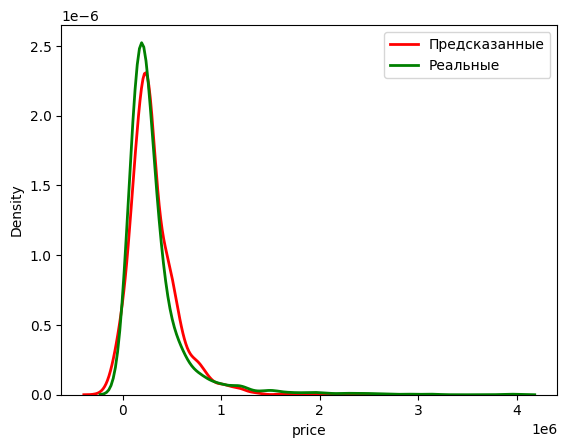

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(y_pred_lr, color='red', label='Предсказанные', linewidth=2)
sns.kdeplot(y_test, color='green', label='Реальные', linewidth=2)
plt.legend()
plt.show()

In [9]:
# Маштабирование данных

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# L1 модель (Lasso)
lasso = Lasso(alpha=0.5, max_iter=50000).fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
errors(y_pred_lasso)
lasso.coef_

MAE = 108654.39959575233
MSE = 37839483722.07237
RMSE = 194523.73562645863
MAPE = 0.48621834979303175
R^2 = 0.6818532610152535


array([ 1.51132672e+05, -1.01636764e+05, -5.07836522e+04, -3.15669979e+03,
        7.88796459e+04,  9.27285168e+01, -1.29193589e+03,  4.71098958e+02,
        0.00000000e+00,  3.52356292e+03,  2.91502823e+02,  1.16969439e+03])

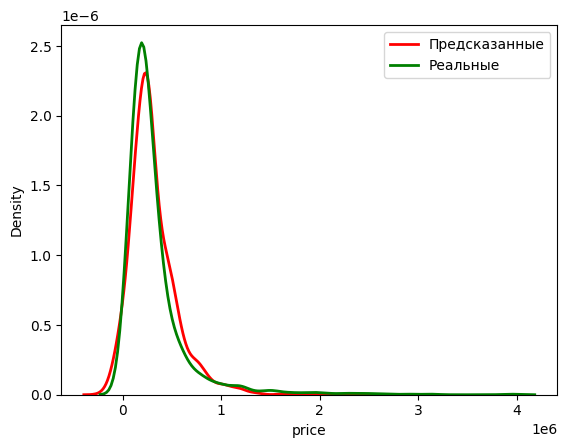

In [11]:
sns.kdeplot(y_pred_lasso, color='red', label='Предсказанные', linewidth=2)
sns.kdeplot(y_test, color='green', label='Реальные', linewidth=2)
plt.legend()
plt.show()

In [12]:
# L2 модель (Ridge)
ridge = Ridge(alpha=0.5, max_iter=50000).fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
errors(y_pred_ridge)
ridge.coef_

MAE = 108650.76056716315
MSE = 37840887249.78695
RMSE = 194527.34319315356
MAPE = 0.4861749820181986
R^2 = 0.6818414604376148


array([ 1.51105455e+05, -1.01629218e+05, -5.07798179e+04, -3.12831179e+03,
        7.88695473e+04,  1.29310631e+02, -1.29184933e+03,  4.72200884e+02,
        1.29310631e+02,  3.52323109e+03,  1.29310631e+02,  1.17000949e+03])

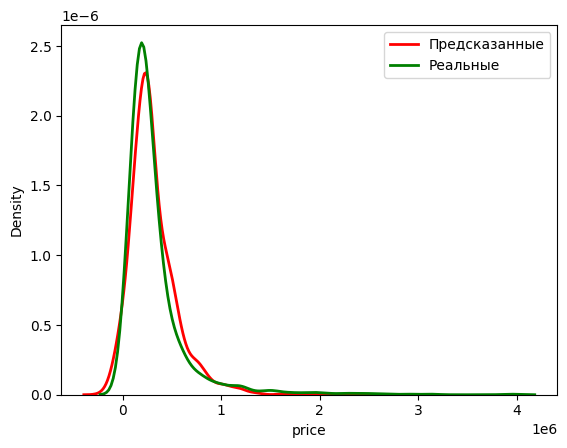

In [13]:
sns.kdeplot(y_pred_ridge, color='red', label='Предсказанные', linewidth=2)
sns.kdeplot(y_test, color='green', label='Реальные', linewidth=2)
plt.legend()
plt.show()

In [14]:
# Elastic Net (комбинация L1 и L2)
el = ElasticNet(alpha=0.5, max_iter=50000).fit(X_train, y_train)
y_pred_el = el.predict(X_test)
errors(y_pred_el)
el.coef_

MAE = 127082.28327775917
MSE = 50198533057.99857
RMSE = 224050.291358879
MAPE = 0.5729928312039535
R^2 = 0.5779408696079964


array([ 2.85960808e+02, -4.02970896e+04, -1.10097086e+04,  1.63940731e+04,
        6.03175347e+04, -3.86288934e+03, -2.83824649e+02,  2.39139324e+03,
       -3.86275562e+03,  2.97025469e+03, -3.86274335e+03, -1.83643248e+01])

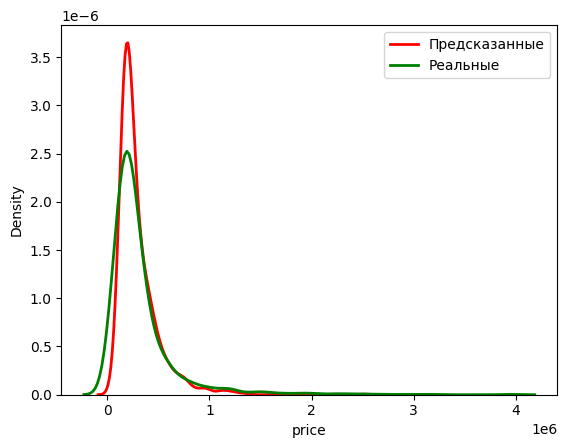

In [15]:
sns.kdeplot(y_pred_el, color='red', label='Предсказанные', linewidth=2)
sns.kdeplot(y_test, color='green', label='Реальные', linewidth=2)
plt.legend()
plt.show()

In [16]:
# Полиномиальная регрессия

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_p = poly.fit_transform(X_train_scaled)
X_test_p = poly.transform(X_test_scaled)
lr2 = LinearRegression().fit(X_train_p, y_train)
y_pred_p = lr2.predict(X_test_p)
errors(y_pred_p)
lr2.coef_

MAE = 88775.43704897702
MSE = 27397386504.49085
RMSE = 165521.5590323232
MAPE = 0.3509277853030005
R^2 = 0.7696483060622716


array([ 1.26623818e+05, -9.59268197e+04, -7.17648883e+04,  2.21842933e+04,
        1.96430618e+04,  6.77882875e+02, -9.97050689e-01,  2.27113563e+02,
        6.77882875e+02,  2.12829491e+04,  6.77882875e+02,  4.50254073e+01,
       -1.04512568e+04, -4.65658301e+04, -3.63148441e+04,  6.81029371e+03,
        1.77254511e+04,  2.96392082e+02,  2.38058412e+03,  2.40985593e+03,
        2.96392082e+02, -8.01570712e+03,  2.96392082e+02,  9.70679945e+03,
        2.84665967e+03,  3.07531195e+04,  5.03622818e+03, -3.76996345e+04,
        1.45904559e+03, -1.99160913e+03,  3.55376419e+03,  1.45904559e+03,
       -1.74423540e+03,  1.45904559e+03,  2.26477376e+03,  5.10631670e+03,
        1.29634852e+04, -1.82312666e+04, -6.72536513e+02, -1.59857994e+03,
        1.85154696e+03, -6.72536513e+02, -5.35164442e+02, -6.72536513e+02,
        1.03093049e+03, -1.75084923e+03,  1.34481505e+03, -3.38094247e+02,
       -1.22576640e+03,  5.80715085e+03, -3.38094247e+02,  8.08668422e+03,
       -3.38094247e+02, -

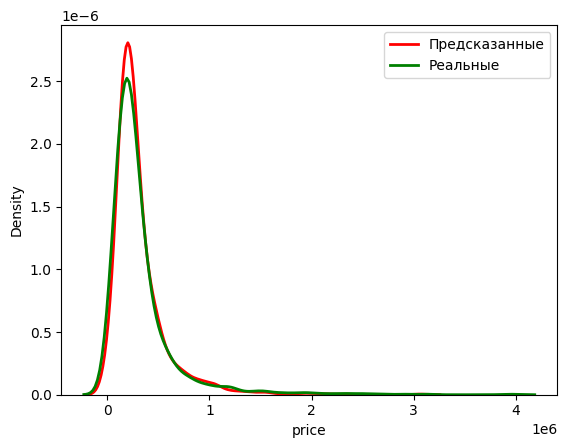

In [17]:
sns.kdeplot(y_pred_p, color='red', label='Предсказанные', linewidth=2)
sns.kdeplot(y_test, color='green', label='Реальные', linewidth=2)
plt.legend()
plt.show()

In [18]:
from ridge import ridge

my = ridge(alpha=0.3, n_iter=50000, learning_rate=0.01)
my.fit(X_train_scaled, y_train)
y_pred_my = my.predict(X_test_scaled)
errors(y_pred_my)
my.coef_()

Остановка на итерации 3514, ||dw||: 0.000001, |db|: 0.000000
MAE = 104924.15502139131
MSE = 40231561706.74241
RMSE = 200578.068857845
MAPE = 0.4311423494987753
R^2 = 0.6617411523033669


array([122326.93151046, -90583.42072753, -44690.65606098,  22643.98233061,
        69803.09999465,   1154.24754754,   -788.20531756,   1015.02886404,
         1154.24754754,   2610.73143729,   1154.24754754,    902.91618926])

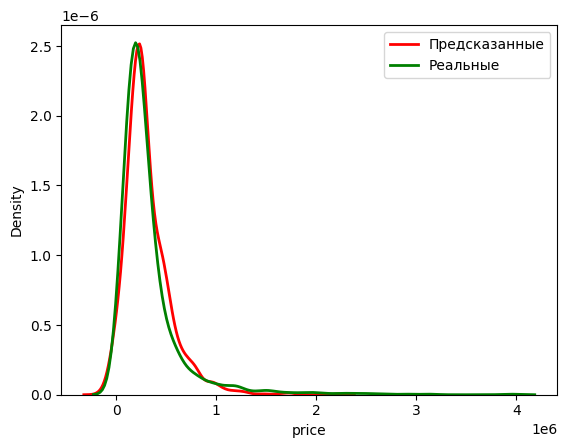

In [19]:
sns.kdeplot(y_pred_my, color='red', label='Предсказанные', linewidth=2)
sns.kdeplot(y_test, color='green', label='Реальные', linewidth=2)
plt.legend()
plt.show()

# Поиск оптимального гиперпараметра для моделей 

In [20]:
# Импорт методов для подбора гиперпараметра
from hyperparameter_search import hyperparameter_search
import numpy as np

In [21]:
from hyperparameter_search import hyperparameter_search

models, methods = ('lasso', 'ridge', 'elasticnet'), ('GridSearchCV', 'RandomizedSearchCV')
parameters = {
    'lasso': {'alpha': np.arange(0.1, 10.1, 0.1)},
    'ridge': {'alpha': np.arange(0.1, 10.1, 0.1)},
    'elasticnet': {'alpha': np.arange(0.1, 10.1, 0.1), 'l1_ratio': np.arange(0.1, 1.1, 0.1)}
}

best_parameters = {}

for model in models:
    for method in methods:
        best_parameter = hyperparameter_search(model_name=model, method_search=method, parameters=parameters[model], X_train=X_train_scaled, y_train=y_train)
        best_parameters[f'{model}_{method}'] = best_parameter
        print(f'Лучший параметр для {model.capitalize()} методом {method}: {best_parameter}')

Лучший параметр для Lasso методом GridSearchCV: {'alpha': np.float64(10.0)}
Лучший параметр для Lasso методом RandomizedSearchCV: {'alpha': np.float64(8.7)}
Лучший параметр для Ridge методом GridSearchCV: {'alpha': np.float64(10.0)}
Лучший параметр для Ridge методом RandomizedSearchCV: {'alpha': np.float64(9.9)}
Лучший параметр для Elasticnet методом GridSearchCV: {'alpha': np.float64(0.1), 'l1_ratio': np.float64(0.9)}
Лучший параметр для Elasticnet методом RandomizedSearchCV: {'l1_ratio': np.float64(0.6), 'alpha': np.float64(1.0)}


In [22]:
# Optuna

from optuna_best_params import optuna

for model in models:
    best_parameter = optuna(model, X_train=X_train_scaled, y_train=y_train, X_test=X_test_scaled, y_test=y_test)
    best_parameters[f'{model}_optuna'] = best_parameter
    print(f'Лучший параметр для {model.capitalize()} методом optuna: {best_parameter}')

ModuleNotFoundError: No module named 'optuna'

In [ ]:
print(best_parameters)

{'lasso_GridSearchCV': {'alpha': np.float64(10.0)}, 'lasso_RandomizedSearchCV': {'alpha': np.float64(9.3)}, 'ridge_GridSearchCV': {'alpha': np.float64(10.0)}, 'ridge_RandomizedSearchCV': {'alpha': np.float64(9.9)}, 'elasticnet_GridSearchCV': {'alpha': np.float64(0.2), 'l1_ratio': np.float64(0.9)}, 'elasticnet_RandomizedSearchCV': {'l1_ratio': np.float64(0.9), 'alpha': np.float64(1.9000000000000001)}, 'lasso_optuna': 99.9873718211225, 'ridge_optuna': 0.004617961442010099, 'elasticnet_optuna': (0.027056940204256197, 0.9404037617536398)}


# Построение pipelines

In [ ]:
import importlib
import Pipeline
importlib.reload(Pipeline)
from Pipeline import RegressionPipeline

## 3.1. Простая линейная регрессия. Lasso-регрессия (L1-регуляризация). Ridgeрегрессия (L2-регуляризация). Elastic Net.

In [ ]:
X_simple_train = X_train.iloc[:, [0]]
X_simple_test  = X_test.iloc[:, [0]]

In [ ]:
model_type = ('linear', 'lasso', 'ridge', 'elasticnet')
model_scope = ('simple', 'multiply')

for type in model_type:
    model_pipe_simple = RegressionPipeline(model_scope='simple', model_type=type)
    model_pipe_simple.fit(X_simple_train, y_train)
    y_pred_pipe_simple = model_pipe_simple.predict(X_simple_test)
    print(f'\tМодель: {type}')
    errors(predict_values=y_pred_pipe_simple)
    print('-'*50)

	Модель: linear
MAE = 129117.18207101803
MSE = 48085806802.03343
RMSE = 219284.7619011258
MAPE = 0.6768557070965358
R^2 = 0.5491852539510806
--------------------------------------------------
	Модель: lasso
MAE = 129117.18308055394
MSE = 48085836041.47705
RMSE = 219284.82857114638
MAPE = 0.6768566757126939
R^2 = 0.5491849798250291
--------------------------------------------------
	Модель: ridge
MAE = 129117.22803599824
MSE = 48087140138.50028
RMSE = 219287.80207412422
MAPE = 0.6768998089680464
R^2 = 0.5491727536359008
--------------------------------------------------
	Модель: elasticnet
MAE = 135696.57721377278
MSE = 56074109843.452835
RMSE = 236799.72517605007
MAPE = 0.7786241047596745
R^2 = 0.4742932006305358
--------------------------------------------------


## 3.2. Множественная линейная регрессия. Lasso-регрессия (L1-регуляризация). Ridge-регрессия (L2-регуляризация). Elastic Net

In [ ]:
for type in model_type:
    model_pipe_multiply = RegressionPipeline(model_scope='simple', model_type=type)
    model_pipe_multiply.fit(X_train, y_train)
    y_pred_pipe_multiply = model_pipe_multiply.predict(X_test)
    print(f'\tМодель: {type}')
    errors(predict_values=y_pred_pipe_multiply)
    print('-'*50)

	Модель: linear
MAE = 103909.82176384573
MSE = 34487713321.61319
RMSE = 185708.67863838025
MAPE = 0.514160051047986
R^2 = 0.676670295106008
--------------------------------------------------
	Модель: lasso
MAE = 103909.27098295526
MSE = 34487698588.817924
RMSE = 185708.63897196038
MAPE = 0.5141533019386779
R^2 = 0.6766704332291216
--------------------------------------------------
	Модель: ridge
MAE = 103901.94536283214
MSE = 34489224328.92871
RMSE = 185712.74681326727
MAPE = 0.5140609515646821
R^2 = 0.6766561290885378
--------------------------------------------------
	Модель: elasticnet
MAE = 98289.53063278529
MSE = 39292648098.620155
RMSE = 198223.73243035295
MAPE = 0.4064074610526317
R^2 = 0.631623001625088
--------------------------------------------------


## 3.3. Полиномиальная регрессия.

In [ ]:
for i in range(2, 5):
    model_pipe_poly = RegressionPipeline(model_scope='polynomial', model_type='linear', poly_degree=i)
    model_pipe_poly.fit(X_train, y_train)
    y_pred_pipe_poly = model_pipe_poly.predict(X_test)
    print(f'Степень: {i}')
    errors(predict_values=y_pred_pipe_poly)
    print('-'*50)

Степень: 2
MAE = 86858.48035322211
MSE = 26376854137.376347
RMSE = 162409.52600563905
MAPE = 0.366803799877682
R^2 = 0.7527113385355975
--------------------------------------------------
Степень: 3
MAE = 85863.73070806601
MSE = 28996544566.012257
RMSE = 170283.71785350546
MAPE = 0.35328700684088005
R^2 = 0.7281511792317437
--------------------------------------------------
Степень: 4
MAE = 144417.01276625073
MSE = 344182373804.2281
RMSE = 586670.5837215874
MAPE = 0.4815532630503665
R^2 = -2.2267835305303834
--------------------------------------------------


# Собственные метрики

In [ ]:
import metrics
importlib.reload(metrics)
from metrics import mae, mse, r2_score_, mape, rmse

In [ ]:
models = [y_pred_lr, y_pred_ridge, y_pred_lasso, y_pred_el, y_pred_p]

original = {
    'r2': [],
    'mse': [],
    'rmse': [],
    'mae': [],
    'mape': []
}

custom = {
    'r2': [],
    'mse': [],
    'rmse': [],
    'mae': [],
    'mape': []
}


for model in models:
    original['r2'].append(r2_score(y_true=y_test, y_pred=model))
    original['mse'].append(mean_squared_error(y_true=y_test, y_pred=model))
    original['rmse'].append(sqrt(mean_squared_error(y_true=y_test, y_pred=model)))
    original['mae'].append(mean_absolute_error(y_true=y_test, y_pred=model))
    original['mape'].append(mean_absolute_percentage_error(y_true=y_test, y_pred=model))
    custom['r2'].append(r2_score_(y_true=y_test, y_pred=model))
    custom['mse'].append(mse(y_true=y_test, y_pred=model))
    custom['rmse'].append(rmse(y_true=y_test, y_pred=model))
    custom['mae'].append(mae(y_true=y_test, y_pred=model))
    custom['mape'].append(mape(y_true=y_test, y_pred=model))

In [ ]:
data_original = pd.DataFrame(
    {
        "R^2":  original['r2'],
        "MSE": original['mse'],
        "RMSE": original['rmse'],
        "MAE":  original['mae'],
        "MAPE": original['mape'],
    },
    index=['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet', 'Polynomial']
)

data_custom = pd.DataFrame(
    {
        "R^2":  custom['r2'],
        "MSE": custom['mse'],
        "RMSE": custom['rmse'],
        "MAE":  custom['mae'],
        "MAPE": custom['mape'],
    },
    index=['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet', 'Polynomial']
)

In [ ]:
# Оригинальные метрики

data_original

,R^2,MSE,RMSE,MAE,MAPE
Linear Regression,0.676670,3.448771e+10,185708.678638,103909.821764,0.514160
Ridge,0.676663,3.448847e+10,185710.712265,103905.871723,0.514110
Lasso,0.676670,3.448771e+10,185708.658149,103909.545959,0.514157
ElasticNet,0.580920,4.470088e+10,211425.828410,121272.401086,0.608899
Polynomial,0.752711,2.637685e+10,162409.526006,86858.480353,0.366804


In [ ]:
# Кастомные метрики

data_custom

,R^2,MSE,RMSE,MAE,MAPE
Linear Regression,0.676670,3.448771e+10,185708.678638,103909.821764,0.514160
Ridge,0.676663,3.448847e+10,185710.712265,103905.871723,0.514110
Lasso,0.676670,3.448771e+10,185708.658149,103909.545959,0.514157
ElasticNet,0.580920,4.470088e+10,211425.828410,121272.401086,0.608899
Polynomial,0.752711,2.637685e+10,162409.526006,86858.480353,0.366804


# ВЫВОД

После проделанной работы можно смело сказать сказать, что наилучшим образом себя показала модель полиномиальной регрессии. У неё наивысший коэффициент детерминации, что говорит о том, что модель довольно неплохо прогнозирует значения, а если взглянуть на график, то можно понять, что модель хорошо справляется, ведь плотности предсказанных и реальных значений близки, разве что на пике предсказанных значений больше, что следует из того, что среднее абсолютное значение равно 87к. Также можно заметить значение MAPE, которое объясняет, что модель в среднем ошибается примерно на 36%, звучит не очень, но можно заметить, что у нас есть выбросы значений price. 75 квантиль принимает значение 3.473020e+05, когда максимальное в свою очередь 4.167631e+06, это говорит о том, что после 3.473020e+05, т.е. высоких цен, не очень много, что как раз может влиять на нашу модель.